In [1]:
# Load pacakges ----
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.display import HTML
from IPython.display import Markdown as md
from IPython.core.display import HTML as Center
from config import marker, qof_measure_marker, start_date, end_date, demographics, codelist_path
from IPython.display import Image, display
import base64

from utilities import *
%matplotlib inline


# Changes and variation in QOF Blood Pressure targets
## Indicator: BP002 (Version: 46.0)
## Timeframe: 2019-09-01 and 2022-03-31

# Content

<ul id="docNav">

<li> <a href="#what">What it is</a>
<li> <a href="#why">Why it matters</a>
<li> <a href="#business_rules">Business rules</a>
    <ul>
        <li> <a href="#business_rules_bp002">Indicator BP002</a>
            <ul>
                 <li> <a href="#bp002_denominator">Denominator</a>
                 <li> <a href="#bp002_numerator">Numerator</a>
                 <li> <a href="#bp002_codelists">Codelists</a>
            </ul>
    </ul>
<li> <a href="#methods">Methods</a>
<li> <a href="#results">Results</a>
    <ul>
        <li> <a href="#results_bp002">Indicator BP002</a>
             <ul>
                 <li> <a href="#results_bp002_total">Total</a>
                 <li> <a href="#results_bp002_var_gp">Variation across GP practices</a>
                 <li> <a href="#results_bp002_by_sex">Breakdown by 'sex'</a>
                 <li> <a href="#results_bp002_by_age_band">Breakdown by 'age_band'</a>
                 <li> <a href="#results_bp002_by_region">Breakdown by 'region'</a>
                 <li> <a href="#results_bp002_by_imd">Breakdown by 'imd'</a>
                 <li> <a href="#results_bp002_by_ethnicity">Breakdown by 'ethnicity'</a>
                 <li> <a href="#results_bp002_by_learning_disability">Breakdown by 'learning_disability'</a>
                 <li> <a href="#results_bp002_by_care_home_status">Breakdown by 'care_home_status'</a>
            </ul>
    </ul>
<li> <a href="#discussion">Discussion</a>
<li> <a href="#references">References</a>

</ul>

<a id="what"></a>
# What it is 

The [Quality and Outcomes Framework (QOF)](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/general-practice-data-hub/quality-outcomes-framework-qof) outlines one indicator that focus on blood pressure (BP002). 
We aim to use OpenSAFELY to quantify the extent to which this indicator was disrupted during the pandemic.

<a id="why"></a>
# Why it matters

General practice has been disrupted by the pandemic in many clinical areas (e.g., [Curtis et al., 2021](https://bjgp.org/content/72/714/e63); [Williamson et al., 2020](https://www.nature.com/articles/s41586-020-2521-4)). 
We aim to assess the impact of the pandemic on the routine management of blood pressure. 
High blood pressure is one of the leading risk factors for several diseases (e.g., cardiovascular disease, stroke) worldwide. 
Research suggests that delays in the management of high blood pressure are associated with worse clinical outcomes, for example acute cardiovascular events, or death ([Xu et al., 2015](https://www.bmj.com/content/350/bmj.h158)).

<a id="business_rules"></a>

# Business rules

The denominator and numerator rules for BP002 (Version: 46.0) are outlined below.
Prevalence data is not available for the blood pressure indicator. 
More details about the rules can be found [here](https://digital.nhs.uk/data-and-information/data-collections-and-data-sets/data-collections/quality-and-outcomes-framework-qof/quality-and-outcome-framework-qof-business-rules/qof-business-rules-v46.0-2021-2022-baseline-release).
Dashboards presenting the annual targets of all QOF indicators published by NHSD are available [here](https://digital.nhs.uk/data-and-information/data-tools-and-services/data-services/general-practice-data-hub/quality-outcomes-framework-qof).

<a id="business_rules_bp002"></a>

## Indicator BP002

<a id="bp002_denominator"></a>

### Denominator

| Rule number | Rule | Action if true | Action if false | Rule description or comments |
|:---|:---|:---|:---|:---| 
| 1 | If `PAT_AGE` < 45 | Reject | Next rule | Reject patients from the specified population who are aged less than 45 years old. |
| 2 | If `BP_DAT` > (`PPED` – 5 years) | Select | Next rule | Select patients passed to this rule who had their blood pressure recorded in the 5 year period leading up to and including the payment period end date. |
| 3 | If `BPDEC_DAT` > (`PPED` – 5 years)  | Reject | Next rule | Reject patients passed to this rule chose not to have their blood pressure recorded in the 5 year period leading up to and including the payment period end date. |
| 4 | If `REG_DAT` > (`PPED` – 3 months) | Reject | Select | Reject patients passed to this rule who registered with the GP practice in the 3 month period leading up to and including the payment period end date. |

<a id="bp002_numerator"></a>

### Numerator

| Rule number | Rule | Action if true | Action if false | Rule description or comments |
|:---|:---|:---|:---|:---| 
| 1 | If `BP_DAT` > (`PPED` – 5 years) | Select | Reject | Select patients from the denominator who had their blood pressure recorded in the 5 year period leading up to and including the payment period end date. Reject the remaining patients. |

<a id="bp002_codelists"></a>

### Codelists

Following the QOF business rules for blood pressure (v47) the clinical code clusters below were used.
Further information about the business rules and codelists can be found [here](https://content.digital.nhs.uk/qofesextractspecs) or using the hyperlinks of the cluster names in the table below.

| Cluster name | Description | SNOMED CT |
|:---|:---|:---|
| [BP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bp_cod/20200812/) | Blood pressure (BP) recording codes | ^999012731000230108 |
| [BPDEC_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bpdec_cod/20200812/) | Codes indicating the patient has chosen not to have blood pressure procedure | ^999012611000230106 |

Futher studies looking at blood pressure may also need to investigate home blood pressure management (see [HOMEBP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/homebp_cod/20200812/) and [HOMEBPDEC_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/homebpdec_cod/20211221/)).

<a id="methods"></a>
# Methods

Using OpenSAFELY-TPP, covering 40% of England's population, we have assessed QOF Blood Pressure targets (Indicator: BP002) between 2019-09-01 and 2022-03-31.
The codelist used can be found here at [OpenSAFELY Codelists](https://codelists.opensafely.org/).

The **study population** for each indicator is defined by the denominator rules shown above.
For each month within the study period, we have calculated the percentage of registered patients above 45 years that had their blood pressure recorded in the 5 year period leading up to the month of reporting.
All analytical code and output is available for inspection at the [OpenSAFELY GitHub repository](https://github.com/opensafely/blood-pressure-qof).

<a id="results"></a>
# Results

<a id="results_bp002"></a>
## Indicator BP002

In [2]:
codelist = pd.read_csv(f'../{codelist_path}')

image_paths = {d: f'../output/plot_{d}.png' for d in demographics}
image_paths['total'] = '../output/plot_total.png'

<a id="results_bp002_total"></a>

### Percentage of patients above 45 years that had their blood pressure recorded in the last 5 years

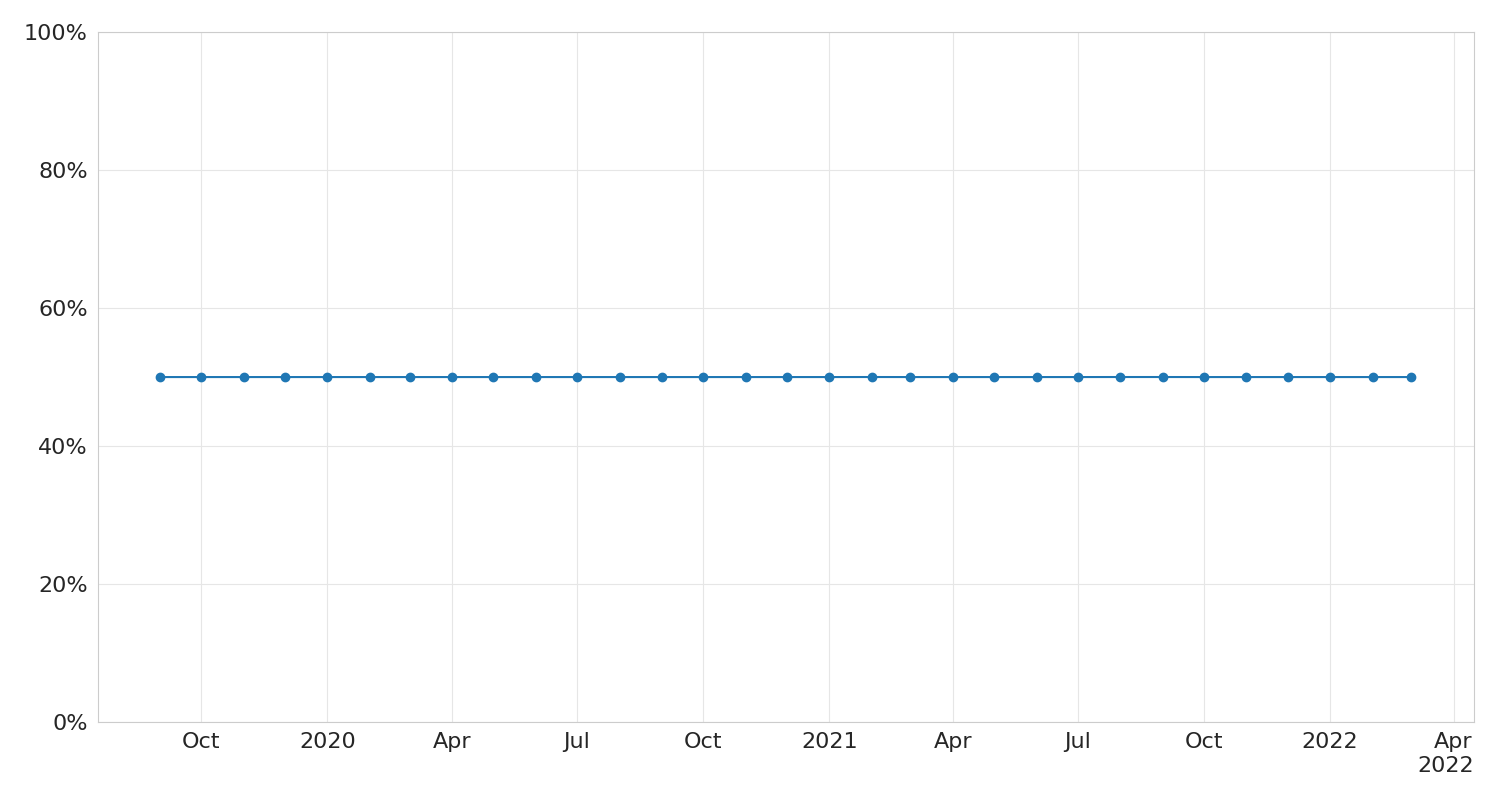

In [3]:
Image(filename=image_paths['total'])

<a id="results_bp002_var_gp"></a>
### Total Number by GP Practice

In [4]:
practice_table = pd.read_csv('../output/rate_table_practice.csv', parse_dates=['date']).sort_values(by='date')
percentage_practices = get_percentage_practices(practice_table)
md(f"Percentage of practices with a recording of a code within the [BP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bp_cod/20200812/) codelist during the study period: {percentage_practices}%")

Percentage of practices with a recording of a code within the [BP_COD](https://www.opencodelists.org/codelist/nhsd-primary-care-domain-refsets/bp_cod/20200812/) codelist during the study period: 102.27%

### Percentage of patients above 45 years that had their blood pressure recorded in the last 5 years across GP practices

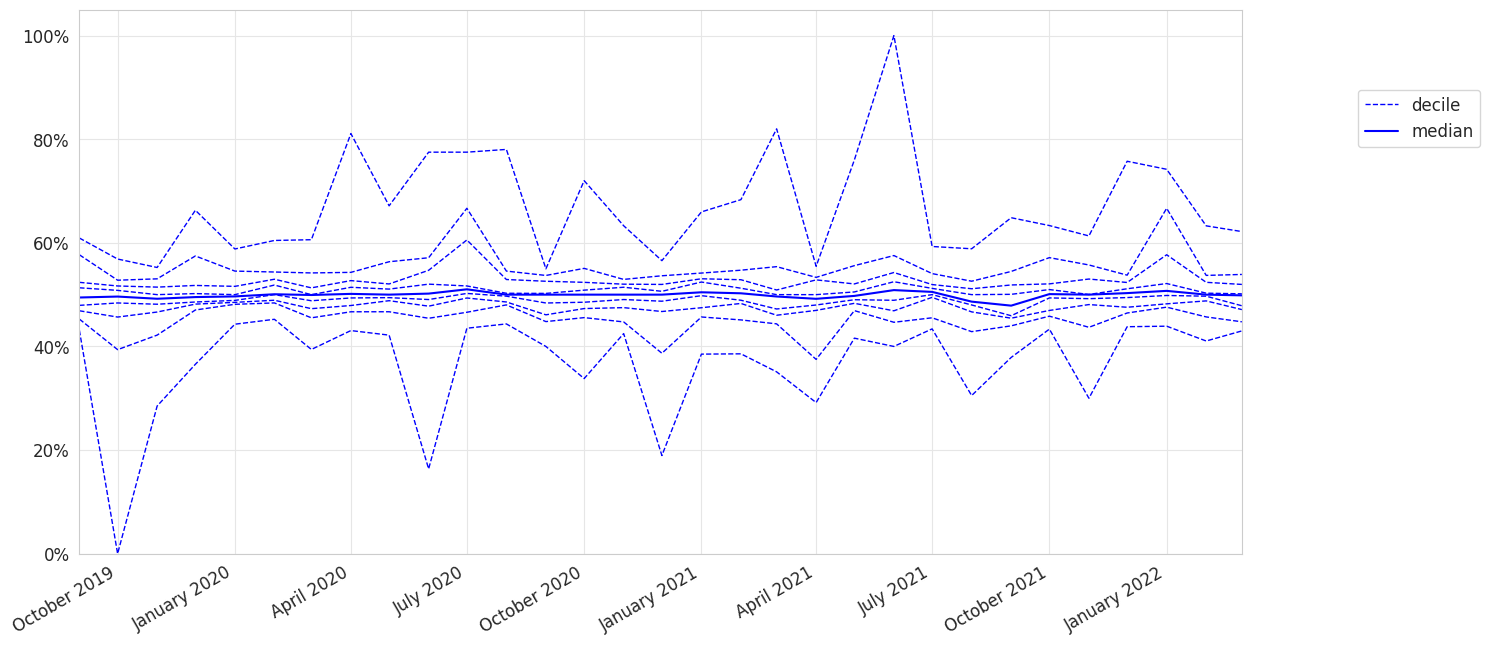

In [5]:
Image(filename='../output/decile_chart.png')

<a id="results_bp002_by_sex"></a>
### Breakdown of BP002 by 'sex'

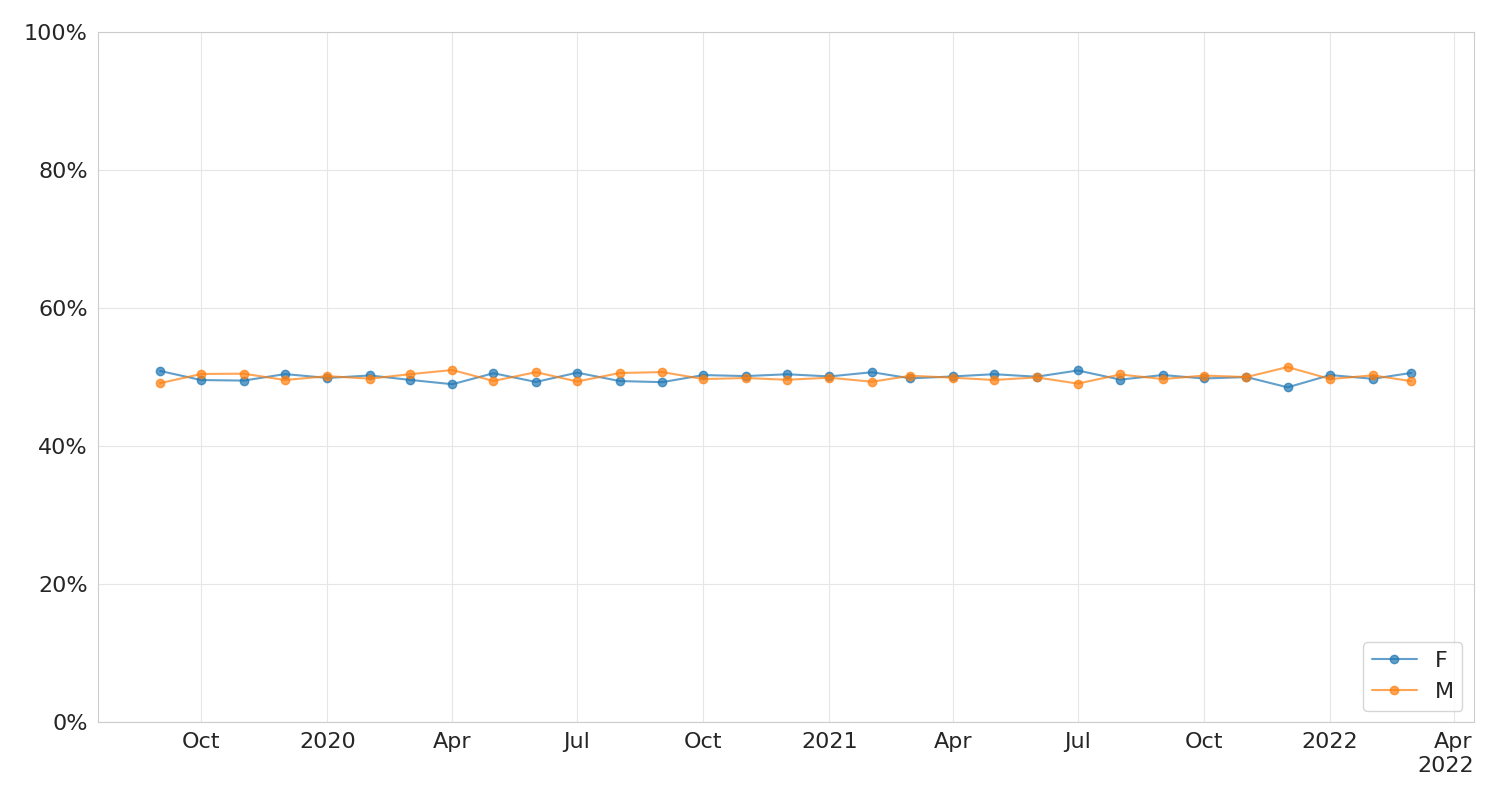

In [6]:
Image(filename=image_paths[demographics[0]])

<a id="results_bp002_by_age_band"></a>
### Breakdown of BP002 by 'age_band'

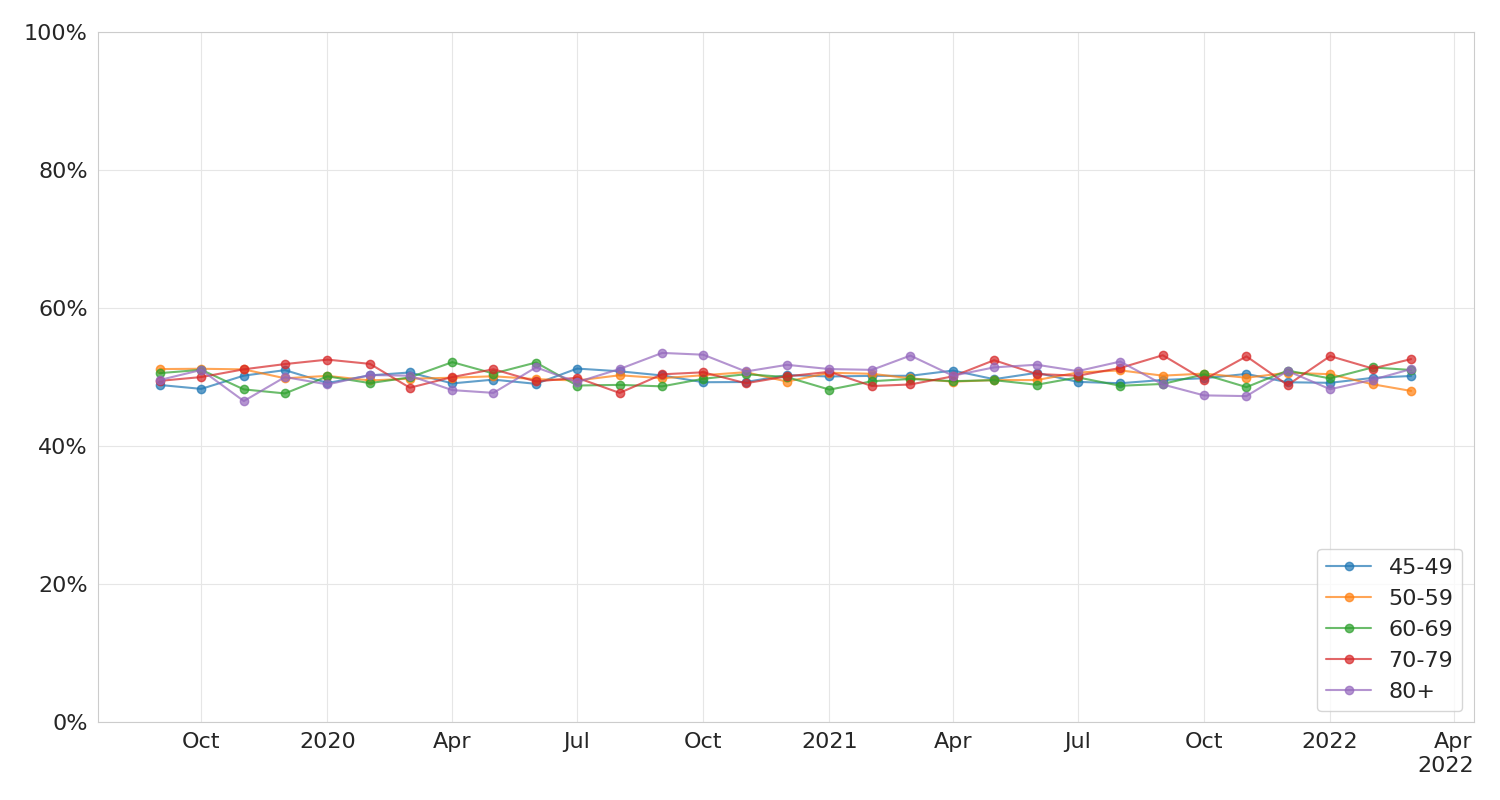

In [7]:
Image(filename=image_paths[demographics[1]])

<a id="results_bp002_by_region"></a>

### Breakdown of BP002 by 'region'

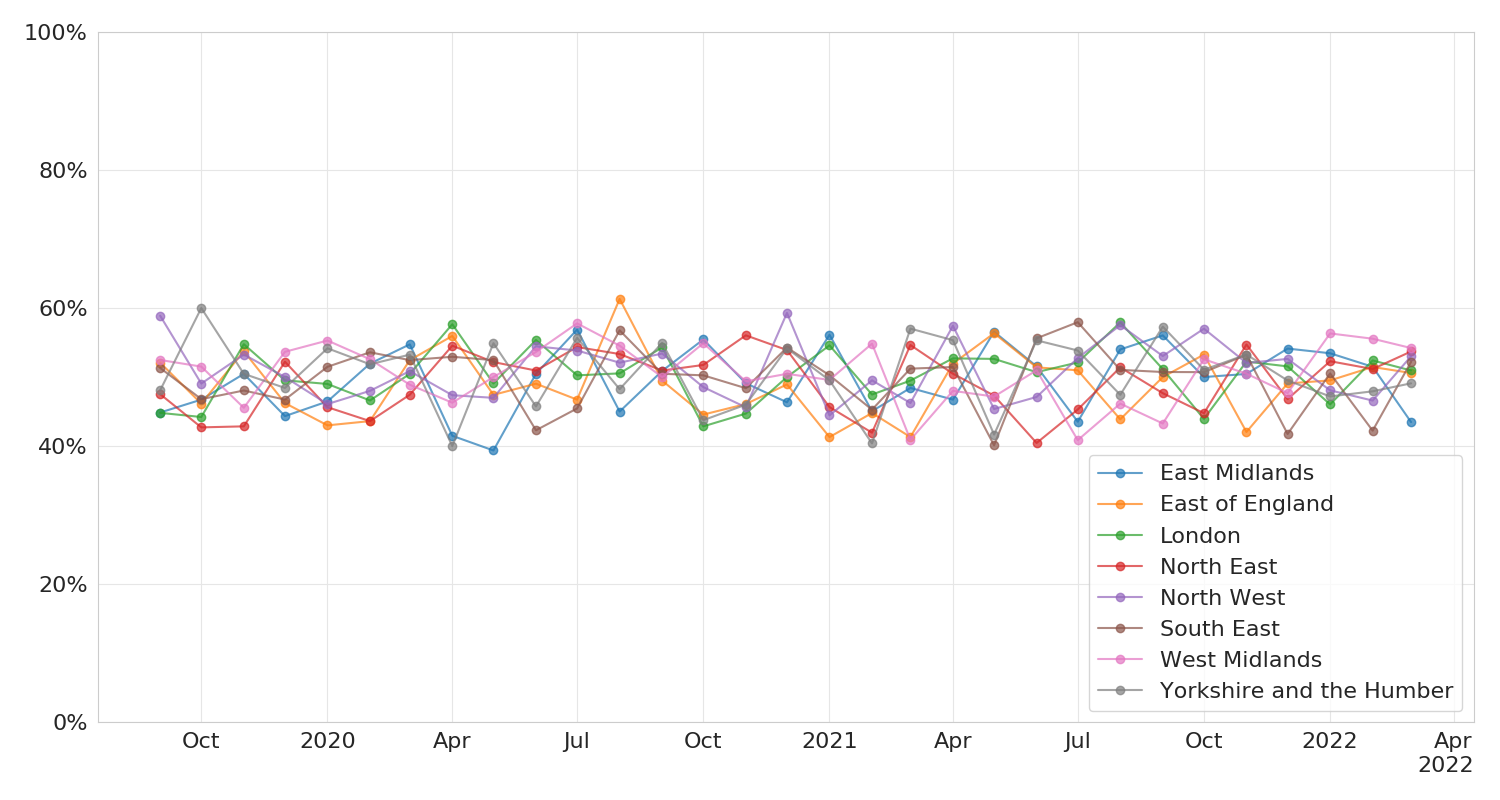

In [8]:
Image(filename=image_paths[demographics[2]])

<a id="results_bp002_by_imd"></a>

### Breakdown of BP002 by 'imd'

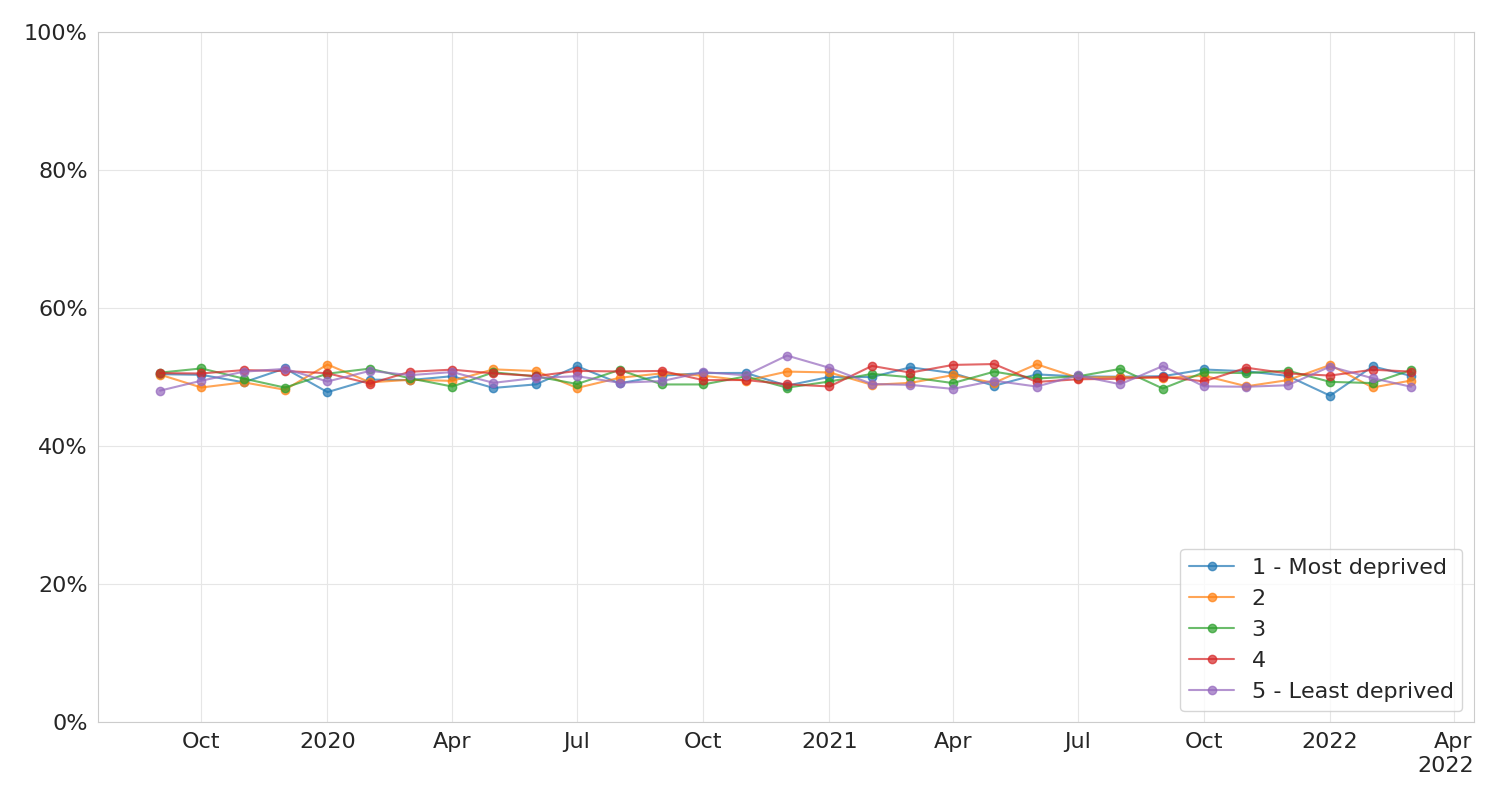

In [9]:
Image(filename=image_paths[demographics[3]])

<a id="results_bp002_by_ethnicity"></a>

### Breakdown of BP002 by 'ethnicity'

The codelist used for 'ethnicity' is available [here](https://www.opencodelists.org/codelist/opensafely/ethnicity/2020-04-27)

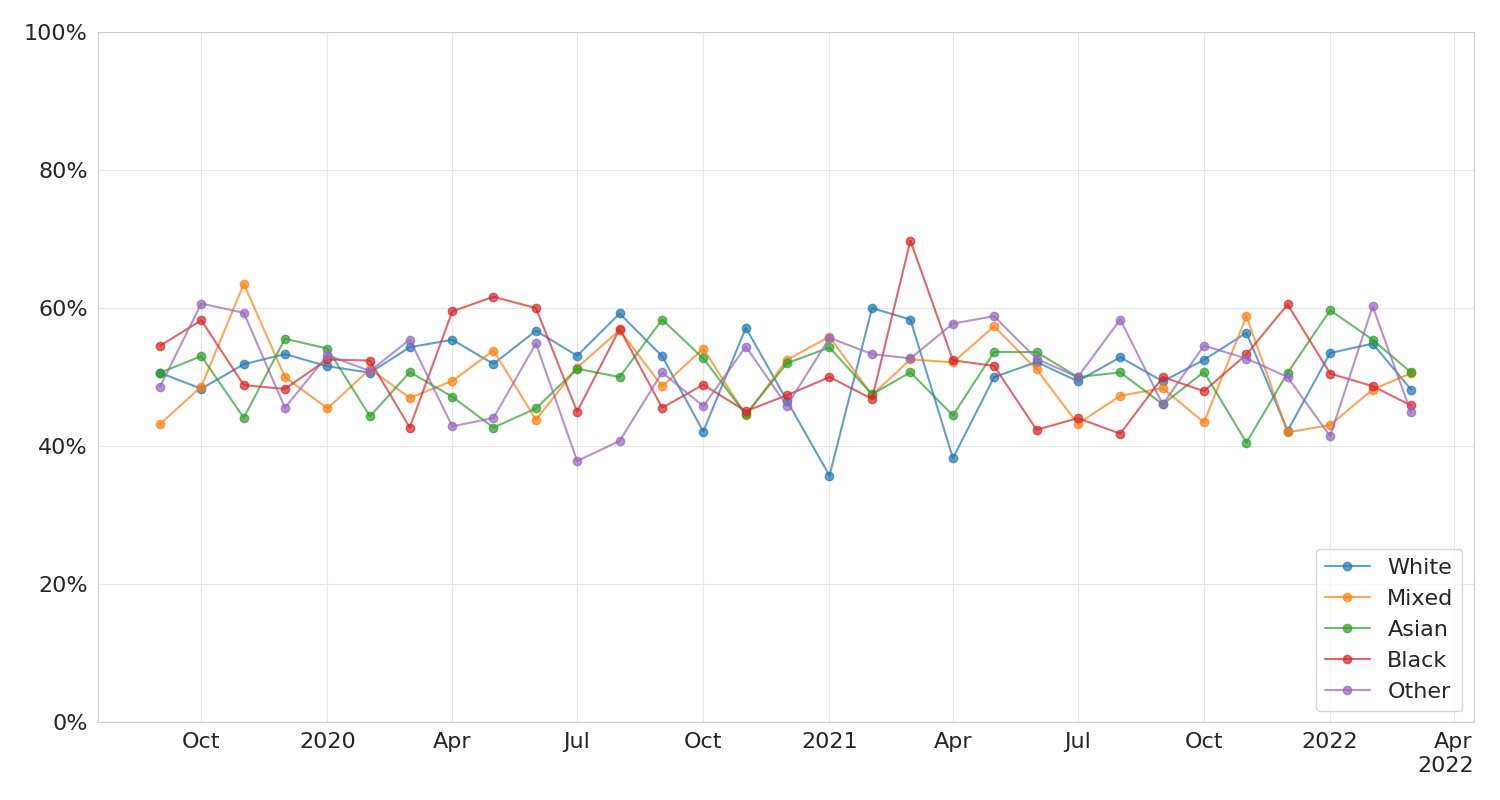

In [10]:
Image(filename=image_paths[demographics[4]])

<a id="results_bp002_by_learning_disability"></a>

### Breakdown of BP002 by 'learning_disability'

The codelist used for 'learning_disability' is available [here](https://www.opencodelists.org/codelist/opensafely/learning-disabilities/2020-07-06)

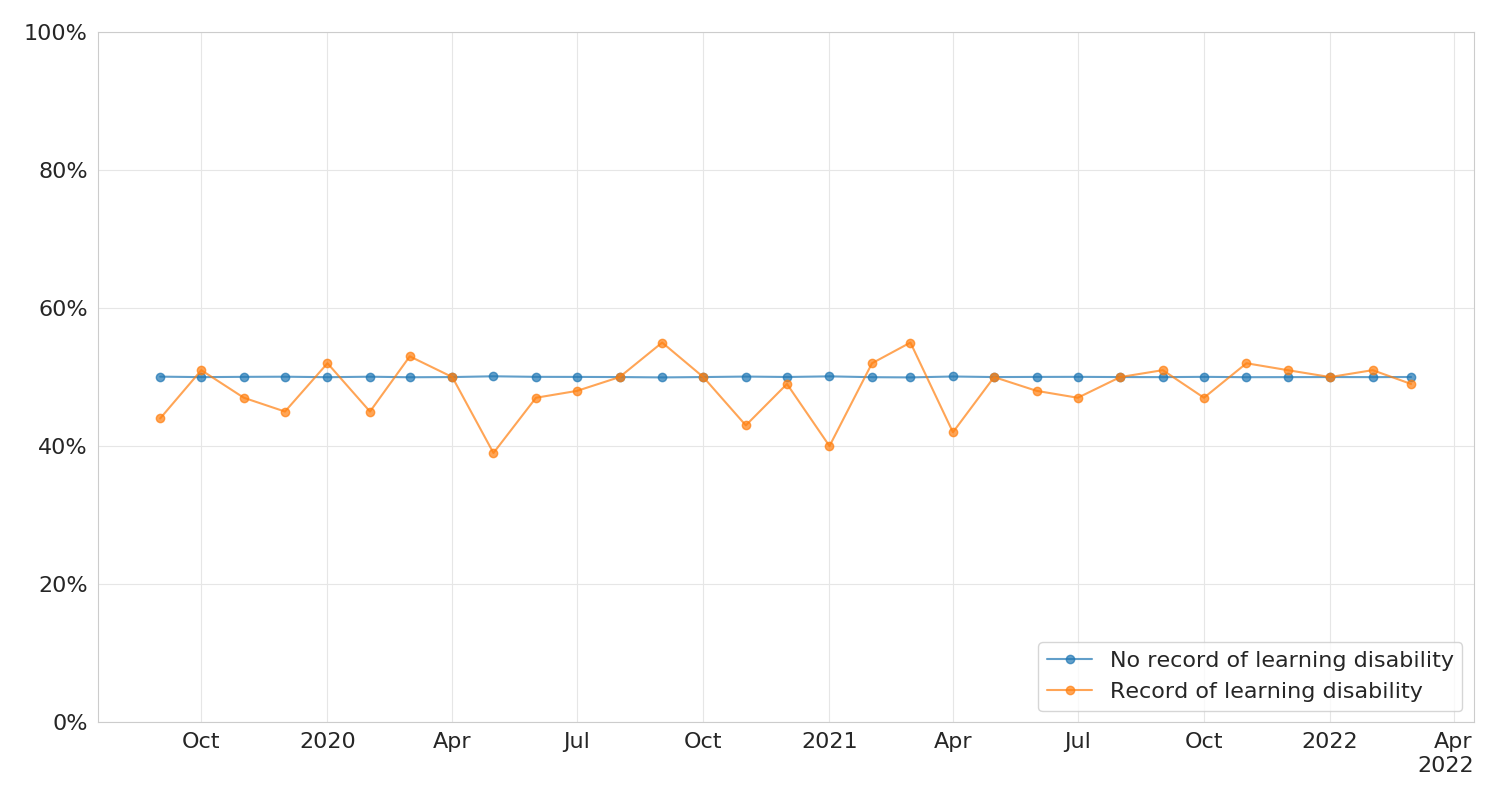

In [11]:
display(Image(filename=image_paths[demographics[5]]))

<a id="results_bp002_by_care_home_status"></a>

### Breakdown of BP002 by 'care_home_status'

The codelist used for 'care_home_status' is available [here](https://www.opencodelists.org/codelist/opensafely/nhs-england-care-homes-residential-status/3712ef13)

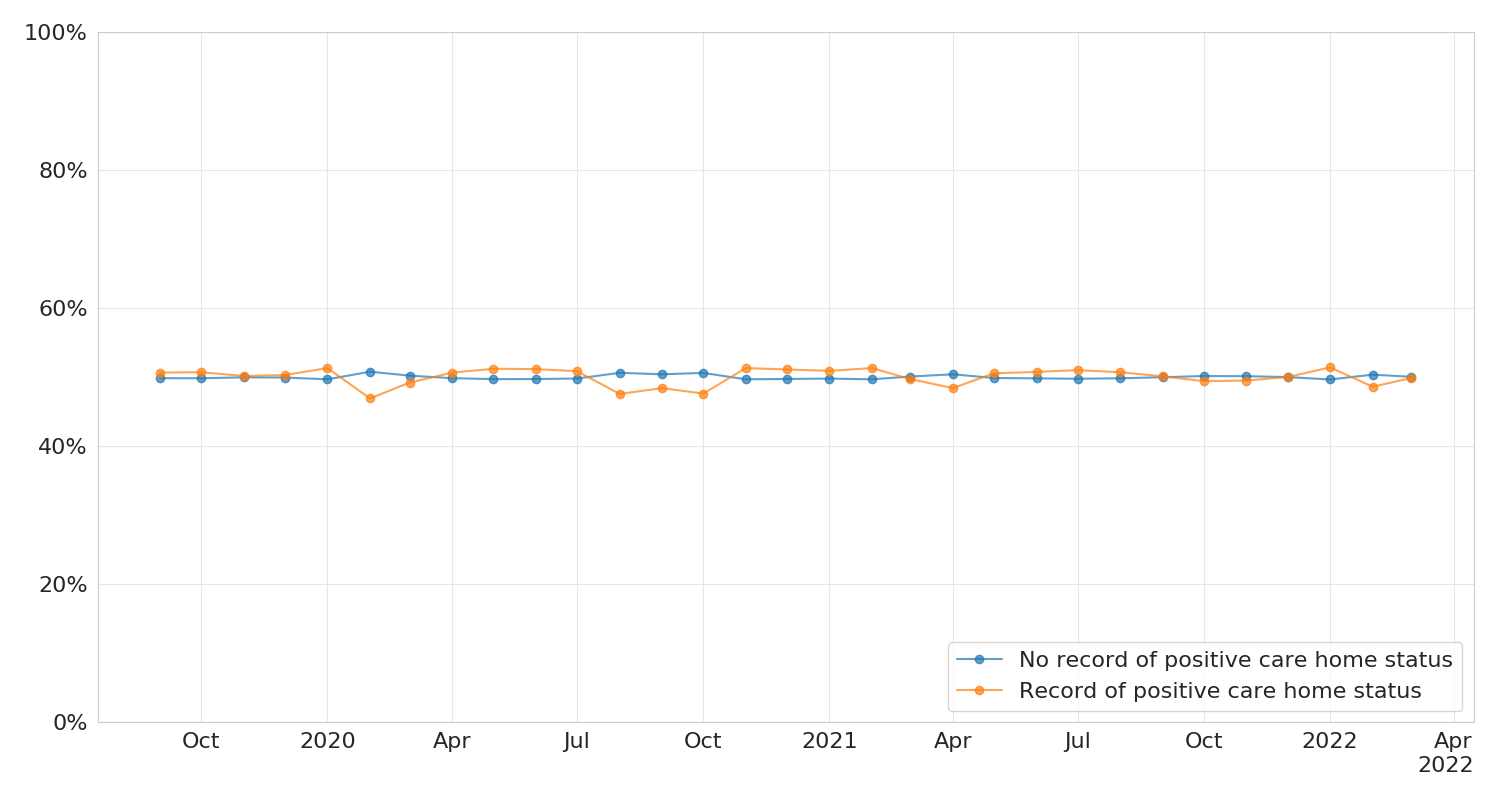

In [12]:
Image(filename=image_paths[demographics[6]]) 

<a id="references"></a>
# References 

1. Curtis HJ, MacKenna B, Croker R, Inglesby P, Walker AJ, Morley J, et al. OpenSAFELY NHS Service Restoration Observatory 1: describing trends and variation in primary care clinical activity for 23.3 million patients in England during the first wave of COVID-19. Br J Gen Pract [Internet]. 2021 Sep 20 [cited 2021 Oct 5]; Available from: https://bjgp.org/content/early/2021/09/24/BJGP.2021.0380
1. Williamson EJ, Walker AJ, Bhaskaran K, Bacon S, Bates C, Morton CE, et al. Factors associated with COVID-19-related death using OpenSAFELY. Nature. 2020 Aug;584(7821):430–6. https://www.nature.com/articles/s41586-020-2521-4
1. Xu W, Goldberg SI, Shubina M, Turchin A. Optimal systolic blood pressure target, time to intensification, and time to follow-up in treatment of hypertension: population based retrospective cohort study. BMJ. 2015 Feb 5;350:h158. https://www.bmj.com/content/350/bmj.h158

